## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
import numpy as np


warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('./datasets/Churn.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Скачали данные. Столбец с фамилией клиентов можем отбросить, как и столбец с индексом строки, в силу ненадобности. 

In [3]:
data = data.drop(['Surname', 'RowNumber'], axis=1)
data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Видны пропуски в столбце "Tenure"

In [4]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Можно было бы предположить что пропуски обозначают 0, но в данном столбце уже есть нули, что значит, что наше предположение лучше будет отбросить. Так как пропусков относительно не так много - удалим их из таблицы. 

In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9091 non-null   int64  
 1   CreditScore      9091 non-null   int64  
 2   Geography        9091 non-null   object 
 3   Gender           9091 non-null   object 
 4   Age              9091 non-null   int64  
 5   Tenure           9091 non-null   float64
 6   Balance          9091 non-null   float64
 7   NumOfProducts    9091 non-null   int64  
 8   HasCrCard        9091 non-null   int64  
 9   IsActiveMember   9091 non-null   int64  
 10  EstimatedSalary  9091 non-null   float64
 11  Exited           9091 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 923.3+ KB


Можем заменить индексы значениями из столбца с уникальным айди клиента. (Дублей среди этих значений нет, так как количество уникальный значений равно изначальному количеству строк таблицы)

In [6]:
data['CustomerId'].unique().shape

(9091,)

In [7]:
data = data.set_index('CustomerId')

### Прямое кодирование
Теперь можем перейти к кодированию категориальных данных методом OHE. Столбцы с категориальными данными - это 'Geography', 'Gender'

In [8]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,,
15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15719294,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
15606229,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
15569892,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1


### Создадим обучающую, тестовую и валидационные выборки

In [9]:
target = data['Exited']
features = data.drop('Exited', axis=1)

def get_samples(target, features):
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.5, random_state=12345, stratify=target
    )
    
    return features_train, features_valid, target_train, target_valid
    
features_train, features_valid, target_train, target_valid = get_samples(target, features)
features_test, features_valid, target_test, target_valid = get_samples(target_valid, features_valid)

print(f'Размер тестовой выборки = {features_test.shape}')
print(f'Размер валидационной выборки = {features_valid.shape}')
print(f'Размер обучающей выборки = {features_train.shape}')

Размер тестовой выборки = (2273, 11)
Размер валидационной выборки = (2273, 11)
Размер обучающей выборки = (4545, 11)


### Стандартизация численных признаков

In [10]:
def get_scaler(features_train, features_valid, features_test):

    numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary']

    scaler = StandardScaler()
    scaler.fit(features_train[numeric])

    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    
    return features_train, features_valid, features_test
    
features_train, features_valid, features_test = get_scaler(features_train, features_valid, features_test)

С предобработкой данных закончили, можем перейти к обучению модели без учета дисбаланса классов

## Исследование задачи

### Модель случайного леса

Попробуем обучить модель случайного леса без учёта дисбаланса классов.

In [11]:
def get_actual_auc(model, target_valid, features_valid):
    probabilities = model.predict_proba(features_valid)

    fpr, tpr, thresholds = roc_curve(target_valid, probabilities[:,1])
    auc_roc = roc_auc_score(target_valid, probabilities[:,1])
    
    return auc_roc, fpr, tpr, thresholds


def show_roc(fpr, tpr, auc_roc):
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC кривая (area = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

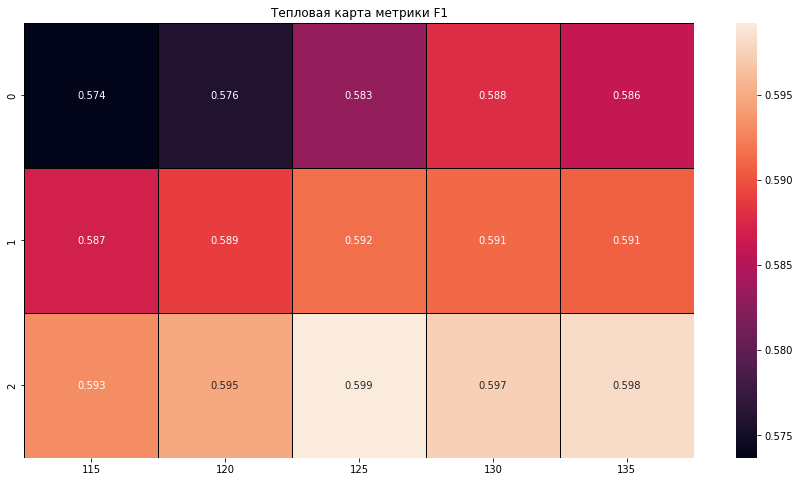

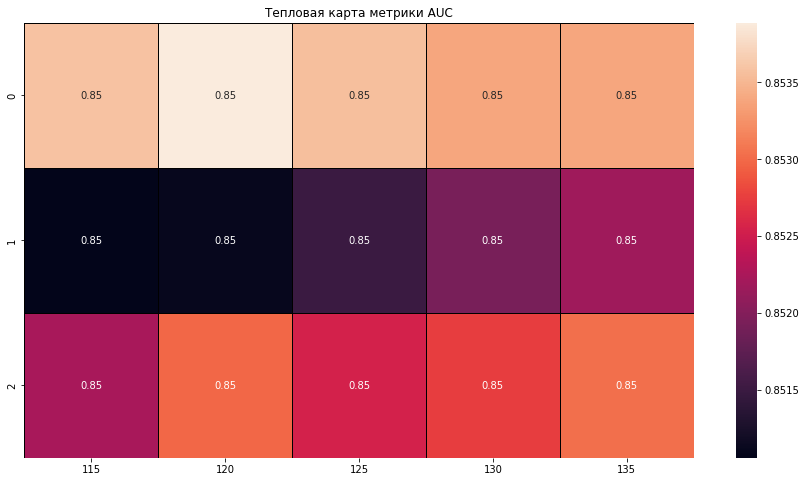

Лучшая точность на валидационной выборке: 0.5992
Параметры лучшей модели: max_depth = 19, n_estimators = 125


In [12]:
def get_best_random_forest(features_train, target_train, features_valid, target_valid, class_weight='balanced'):
    f1_dict = {a : [] for a in range(115, 136, 5)}
    auc_dict = {a : [] for a in range(115, 136, 5)}
    best_f1 = 0

    for n_est in f1_dict:
        for depth in range(17, 20):
            model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=n_est, class_weight=class_weight)

            model.fit(features_train, target_train)

            predictions = model.predict(features_valid)

            actual_f1 = f1_score(target_valid, predictions)
            
            auc_roc, fpr, tpr, thresholds = get_actual_auc(model, target_valid, features_valid)
            auc_dict[n_est].append(auc_roc)
            
            if actual_f1 > best_f1:
                best_f1 = actual_f1
                best_model = model

            f1_dict[n_est].append(actual_f1)

    plt.figure(figsize=(15, 8))
    plt.title('Тепловая карта метрики F1')    
    sns.heatmap(
        pd.DataFrame(f1_dict),
        annot=True,
        fmt='.3g',
        linewidths=1, 
        linecolor='black'
    )
    plt.show()
    
    plt.figure(figsize=(15, 8))
    plt.title('Тепловая карта метрики AUC')
    sns.heatmap(
        pd.DataFrame(auc_dict),
        annot=True,
        fmt='.2g',
        linewidths=1, 
        linecolor='black'
    )
    plt.show()
    
    print(f'Лучшая точность на валидационной выборке: {best_f1:.4f}')
    params = best_model.get_params()
    print(f"Параметры лучшей модели: max_depth = {params['max_depth']}, n_estimators = {params['n_estimators']}")
    
    return best_model
    
best_model = get_best_random_forest(features_train, target_train, features_valid, target_valid)

На хитмэпе видно, что лучшая точность, которую мы смогли получить - это 0.6. Построим ROC кривую

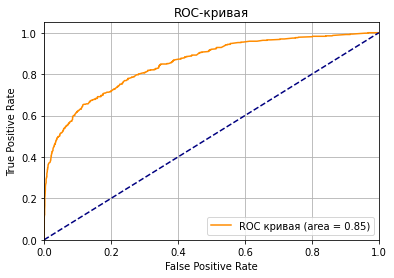

In [13]:
auc_roc, fpr, tpr, thresholds = get_actual_auc(best_model, target_valid, features_valid)
show_roc(fpr, tpr, auc_roc)

Как видно по графику и по значению AUC - наша модель уже проходит тест на вменяемость. 

### Логистическая регрессия

Теперь обучим модель логистической регрессии

Лучшая точность на валидационной выборке: 0.3391


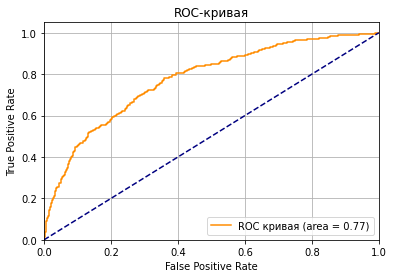

In [14]:
def get_logistic_regression(features_train, target_train, features_valid, target_valid):
    
    best_model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=200)
    
    best_model.fit(features_train, target_train)
    predictions = best_model.predict(features_valid)
    
    print(f'Лучшая точность на валидационной выборке: {f1_score(target_valid, predictions):.4f}')
    return best_model
    
best_logist_model = get_logistic_regression(features_train, target_train, features_valid, target_valid)

auc_roc, fpr, tpr, thresholds = get_actual_auc(best_logist_model, target_valid, features_valid)
show_roc(fpr, tpr, auc_roc)

Модель логистической регрессии справилась хуже. Это видно по метрикам AUC и F1 

Посмотрим насколько несбалансированы данные в нашей обучающей выборке.

In [15]:
def compare_classes(features, target): 
    print("Количество элементов положительного класса =", features[target == 1].shape[0])
    print("Количество элементов отрицательного класса =", features[target == 0].shape[0])
    print(f"Элементов отрицательного класса больше элементов положительного в {features[target == 0].shape[0]/features[target == 1].shape[0]:.2f} раз")
    
compare_classes(features, target)

Количество элементов положительного класса = 1854
Количество элементов отрицательного класса = 7237
Элементов отрицательного класса больше элементов положительного в 3.90 раз


### Вывод

Выяснили, что экземлпяров одного класса больше практически в 4 раза, чем другого класса. Перейдём к обучению с учётом дисбаланса классов. Также заметно, что модель случайного леса проявила себя лучше на обучении без учета дисбаланса

## Борьба с дисбалансом

### Увеличиваем меньшую выборку

Увеличим выборку меньшего класса в 4 раза. 

In [16]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train, features_valid, target_train, target_valid = get_samples(target, features)
features_test, features_valid, target_test, target_valid = get_samples(target_valid, features_valid)

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

compare_classes(features_train_upsampled, target_train_upsampled)

Количество элементов положительного класса = 3708
Количество элементов отрицательного класса = 3618
Элементов отрицательного класса больше элементов положительного в 0.98 раз


Попробуем обучить нашу модель на текущих выборках, чтобы посмотреть, удалось ли нам улучшить результат. 

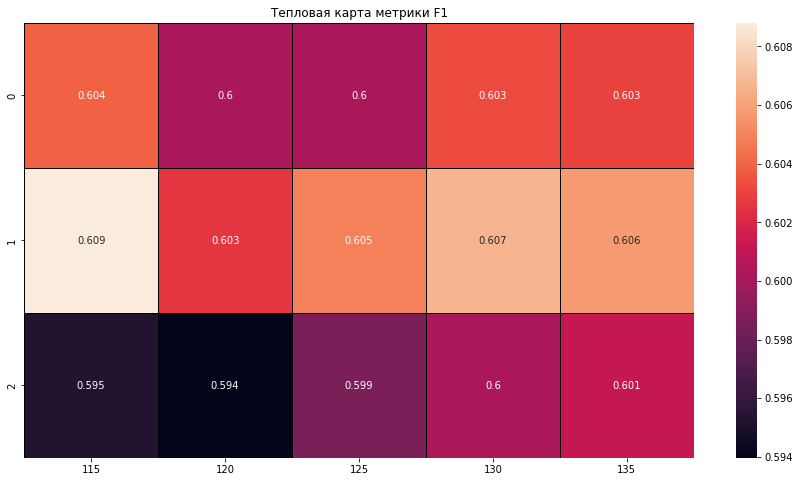

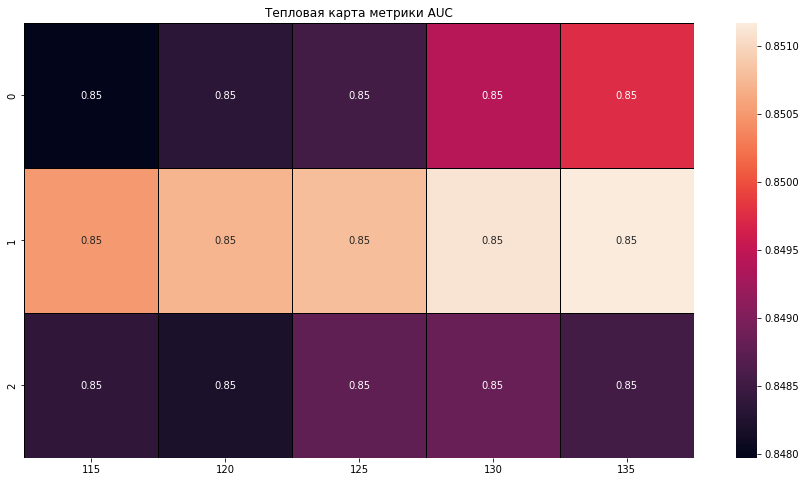

Лучшая точность на валидационной выборке: 0.6088
Параметры лучшей модели: max_depth = 18, n_estimators = 115


In [17]:
best_forest_model = get_best_random_forest(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

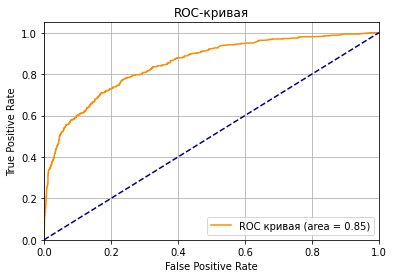

In [18]:
auc_roc, fpr, tpr, thresholds = get_actual_auc(best_forest_model, target_valid, features_valid)
show_roc(fpr, tpr, auc_roc)

Получилось увеличить точность F1 Метрики. Как и ROC кривая теперь выглядит лучше. Тем не менее попробуем уменьшить больший класс в 2 раза и увеличить в 2 раза меньший класс. Сохраним модель отдельно.

### Увеличиваем меньшую выборку и уменьшаем большую 

In [19]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [20]:
features_train, features_valid, target_train, target_valid = get_samples(target, features)
features_test, features_valid, target_test, target_valid = get_samples(target_valid, features_valid)

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.5)
features_train_combined, target_train_combined = upsample(features_train_downsampled, target_train_downsampled, 2)

compare_classes(features_train_combined, target_train_combined)

Количество элементов положительного класса = 1854
Количество элементов отрицательного класса = 1809
Элементов отрицательного класса больше элементов положительного в 0.98 раз


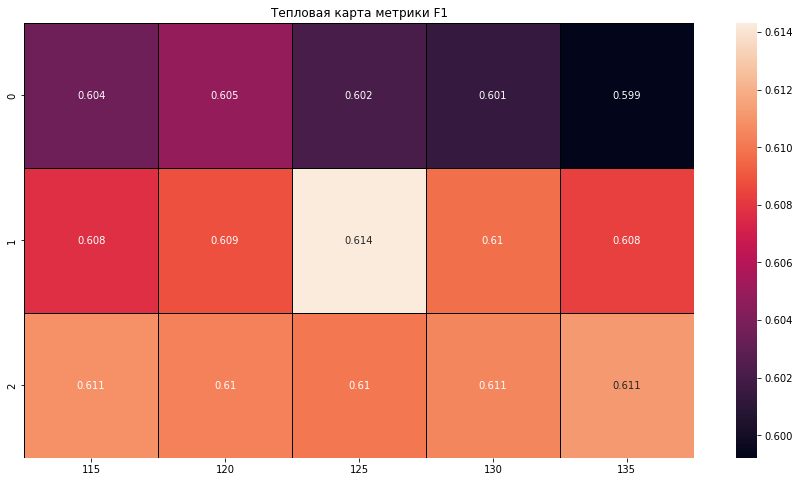

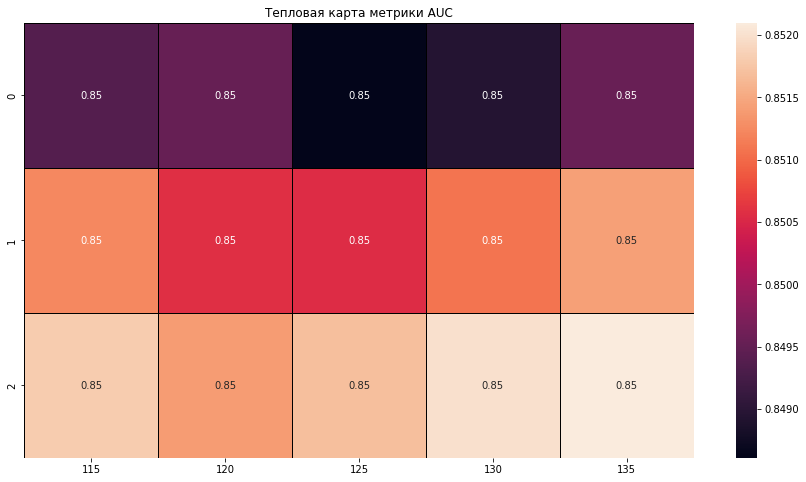

Лучшая точность на валидационной выборке: 0.6143
Параметры лучшей модели: max_depth = 18, n_estimators = 125


In [21]:
best_forest_model = get_best_random_forest(features_train_combined, target_train_combined, features_valid, target_valid)

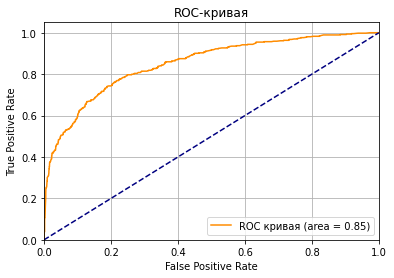

In [22]:
auc_roc, fpr, tpr, thresholds = get_actual_auc(best_forest_model, target_valid, features_valid)
show_roc(fpr, tpr, auc_roc)

Метрики стали хуже, поэтому вернемся к предыдущему варианту - увеличим меньший класс в 4 раза

### Уменьшаем больший класс в 4 раза

In [23]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)

compare_classes(features_train_downsampled, target_train_downsampled)

Количество элементов положительного класса = 927
Количество элементов отрицательного класса = 904
Элементов отрицательного класса больше элементов положительного в 0.98 раз


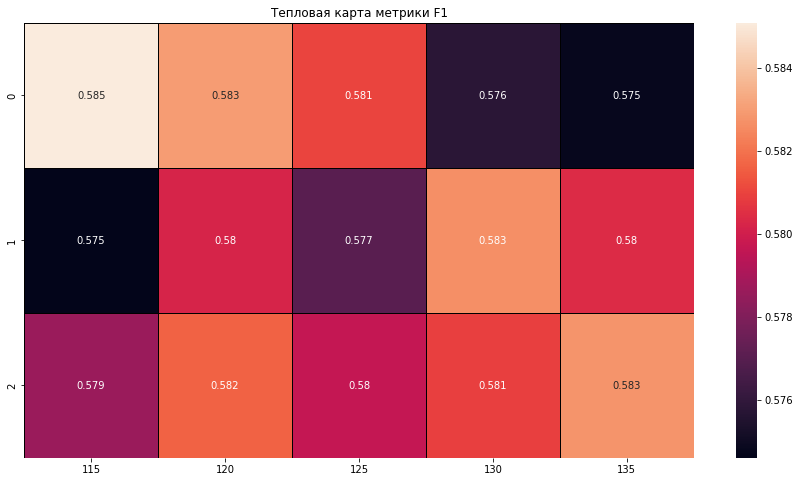

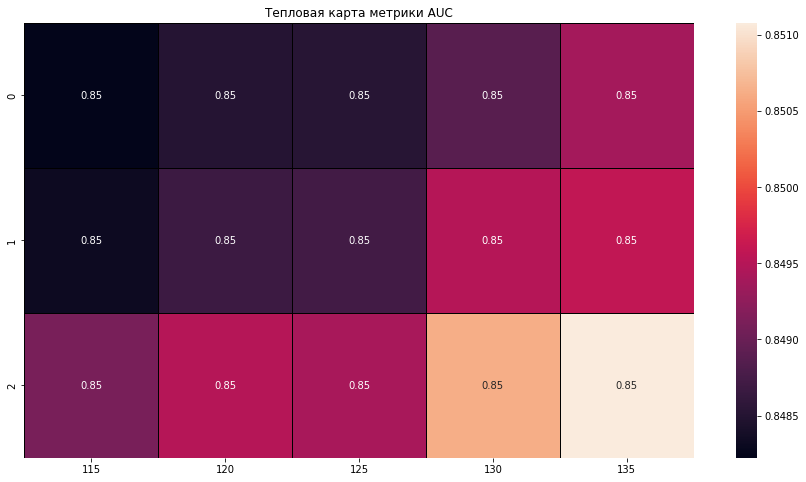

Лучшая точность на валидационной выборке: 0.5851
Параметры лучшей модели: max_depth = 17, n_estimators = 115


In [24]:
best_forest_model = get_best_random_forest(features_train_downsampled, target_train_downsampled, features_valid, target_valid)

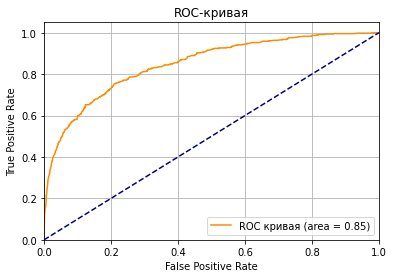

In [25]:
auc_roc, fpr, tpr, thresholds = get_actual_auc(best_forest_model, target_valid, features_valid)
show_roc(fpr, tpr, auc_roc)

Лучше всего себя показала модель, которая была обучена на скомбиннаровоном методе борьбы с дисбалансом - когда мы уменьшили больший класс в 2 раза и увеличили меньший в 2.

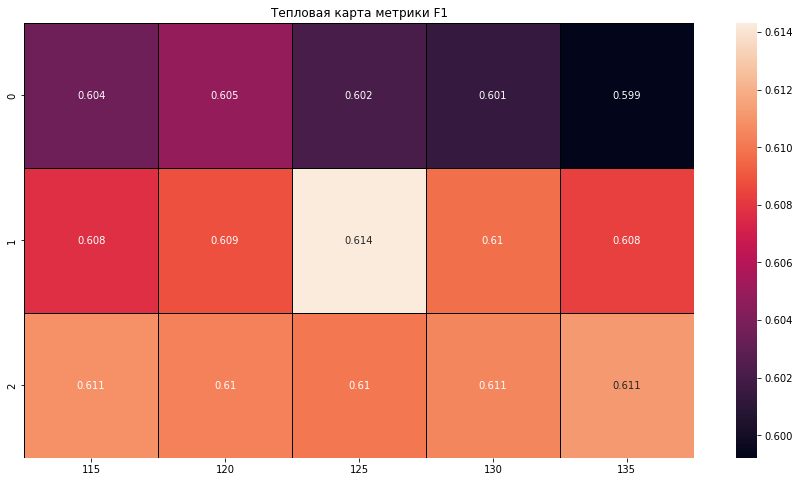

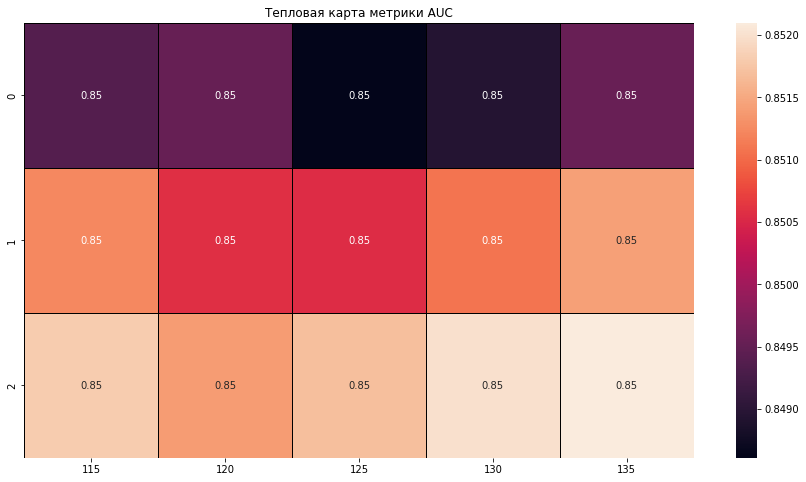

Лучшая точность на валидационной выборке: 0.6143
Параметры лучшей модели: max_depth = 18, n_estimators = 125


In [26]:
best_forest_model = get_best_random_forest(features_train_combined, target_train_combined, features_valid, target_valid)

### Обучаем модель логистической регрессии

Попробуем обучить модель логистической регрессии на сбалансированных выборках

Лучшая точность на валидационной выборке: 0.4416


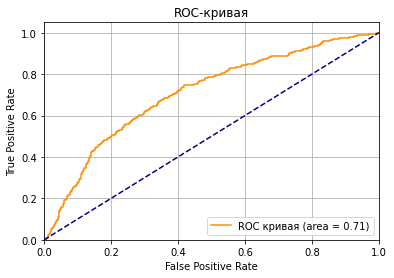

In [27]:
best_logist_model = get_logistic_regression(features_train_combined, target_train_combined, features_valid, target_valid)

auc_roc, fpr, tpr, thresholds = get_actual_auc(best_logist_model, target_valid, features_valid)
show_roc(fpr, tpr, auc_roc)

Метрики у данной модели хуже, чем у случайного леса, поэтому вернемся к случайному лесу и попробуем подобрать порог для него

### Подбираем оптимальный порог

С лучшим порогом (0.5030000000000003) значение метрики F1 = 0.6161515453639083


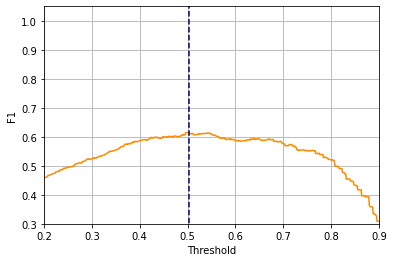

In [28]:
probabilities_valid = best_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

list_threshold = []
best_threshold = 0
actual_f1 = 0
best_f1 = 0
max_range = 0.9
min_range = 0.2
range_threshold = np.arange(min_range, max_range, 0.001)

for threshold in range_threshold:
    predictions = probabilities_one_valid > threshold
    actual_f1 = f1_score(target_valid, predictions)
    if actual_f1 > best_f1:
        best_f1 = actual_f1
        best_threshold = threshold
    list_threshold.append(actual_f1)
    
print(f'С лучшим порогом ({best_threshold}) значение метрики F1 = {best_f1}')


plt.plot(range_threshold.tolist(), list_threshold, color='darkorange')
plt.plot([best_threshold, best_threshold], [0, 1.05], color='navy', linestyle='--')
plt.grid()
plt.xlim([min_range, max_range])
plt.ylim([0.3, 1.05])
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.show()

F1 = 0.6162


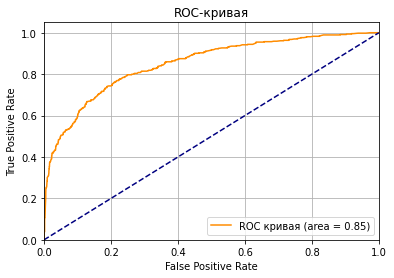

In [29]:
probabilities = best_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

predictions = probabilities_one_valid > best_threshold

print(f'F1 = {f1_score(target_valid, predictions):.4f}')

auc_roc, fpr, tpr, thresholds = get_actual_auc(best_forest_model, target_valid, features_valid)
show_roc(fpr, tpr, auc_roc)

На данной модели получилось добиться удовлетворяющего нас результата. Перейдём к тестированию модели.

## Тестирование модели

F1 = 0.6195


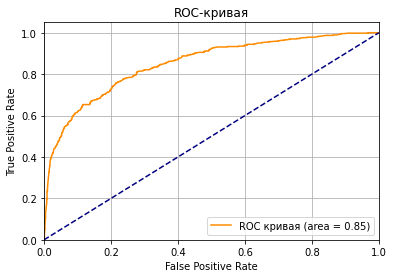

In [30]:
probabilities = best_forest_model.predict_proba(features_test)
probabilities_one_valid = probabilities[:, 1]

predictions = probabilities_one_valid > best_threshold

print(f'F1 = {f1_score(target_test, predictions):.4f}')

auc_roc, fpr, tpr, thresholds = get_actual_auc(best_forest_model, target_test, features_test)
show_roc(fpr, tpr, auc_roc)

## Общий вывод

Удалось добиться следующих метрик: F1 = 0.62, AUC = 0.85

Сделали это засчёт увеличения меньшего класса для достижения баланса классов и засчёт подбора оптимального порога. Лучше всего себя показала модель случайного леса. 